# E-news Express

## Define Problem Statement and Objectives

### Problem Statement
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

### Objective
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Explore the dataset and extract insights using Exploratory Data Analysis.

Do the users spend more time on the new landing page than the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

Is the time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

The idea behind answering these questions is to decide whether the new page is effective enough to gather new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

### Data Description

The data contains the different data related to the users visiting the website pages. The detailed data dictionary is given below

### Data Dictionary
- user_id - This represents the user ID of the person visiting the website.

- group - This represents whether the user belongs to the first group (control) or the second group (treatment).

- landing_page - This represents whether the landing page is new or old.

- time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

- converted - This represents whether the user gets converted to a subscriber of the news portal or not.

- language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings and do not display them

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [3]:
#read the dataset abtest.csv
data = pd.read_csv("abtest.csv")

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [4]:
# view a few rows of the data frame
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# check the number of rows and columns
data.shape

(100, 6)

### Observation:
- The data frame has a 100 rows and 6 columns

In [6]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
# check if there are missing values
# return sum of missing values
data.isnull().sum().sum()

0

### Observation:
- There are no missing values in the data frame

In [8]:
# check memory usage before converting the object data types to category
memory_usage_before = data.memory_usage().sum()
print(memory_usage_before)

4928


In [9]:
### Converting object data types to category. 
### This will reduce memory size and also help in analysis

columns = ["group", "landing_page", "converted", "language_preferred"]

for column in columns:
    data[column] = data[column].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [10]:
# check memory usage after converting the object data types to category
memory_usage_after_conversion = data.memory_usage().sum()
print(memory_usage_after_conversion)

2632


#### Observations:
- All columns that were have object data types are now category 
- The memory usage has reduced from '4.8+ KB to 2.6 KB' as you can see and compare the memory usage before and after

In [11]:
# show statistical summary aof all columns in the data frame
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,new,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,French,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation:
- The minimum and maximum time spent on the pages is 0.19 and 10.71 minutes respectively
- There are two groups of users.
- The converted users were a total of 54
- There are three unique values of languages preferred

### Let us find the values counts of each unique value in the given Series 

In [12]:
# checking the value counts of each unique value in the "group" series
data["group"].value_counts()

control      50
treatment    50
Name: group, dtype: int64

#### Observation:
- There two equal groups of users
- The old landing page was served to 50 users(control)
- The new landing page was served to 50 users (treatment)

In [13]:
# checking the value counts of each unique value in the "landing page" series
data["landing_page"].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

#### Observations:
- There are two landing pages; new and old
- Each landing page has a total of 50 sampled users

In [14]:
# checking the value counts of each unique value in the "converted" series
data["converted"].value_counts()

yes    54
no     46
Name: converted, dtype: int64

#### Observations:
- There are two categories under converted; yes and no
- 54 users were converted and 46 users were not converted

In [15]:
# checking the value counts of each unique value in the "language_preferred" series
data["language_preferred"].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Observations:
- There are three languages that users could choose; French, Spanish, English
- 34 users preferred French
- 34 users preferred Spanish
- and 32 users preferred English

In [16]:
# statistical summary of time spent on the pages
data["time_spent_on_the_page"].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

In [17]:
#create a subsetted dataframe for old landing page users
df_old = data[data["landing_page"]=="old"]
# statistical summary of time spent on the old page
df_old["time_spent_on_the_page"].describe()

count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64

In [18]:
# create a subsetted dataframe for new landing page users
df_new = data[data["landing_page"]=="new"]
# statistical summary of time spent on the new page
df_new["time_spent_on_the_page"].describe()

count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64

#### Observations:
Acoording to the statistical summary above:
- The maximum time spent on the new page is greater than the maximum time spent on the old page
- The average time spent on the new page is greater than the average time spent on the old page
- The minimum time spent on the new page is greater than the minimum time spent on the old page

### Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

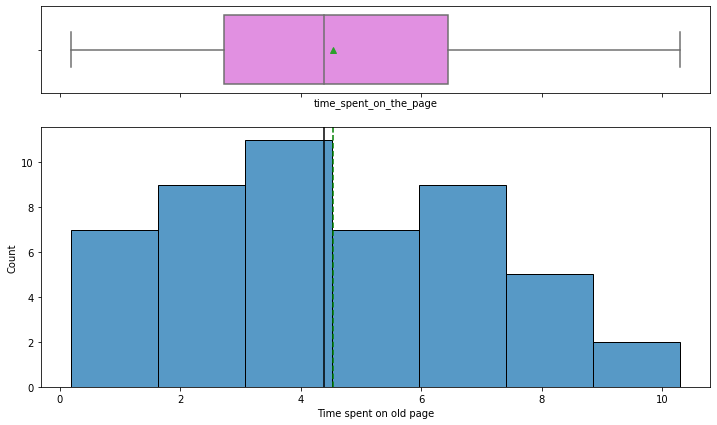

In [20]:
histogram_boxplot(df_old,"time_spent_on_the_page");
plt.xlabel("Time spent on old page");

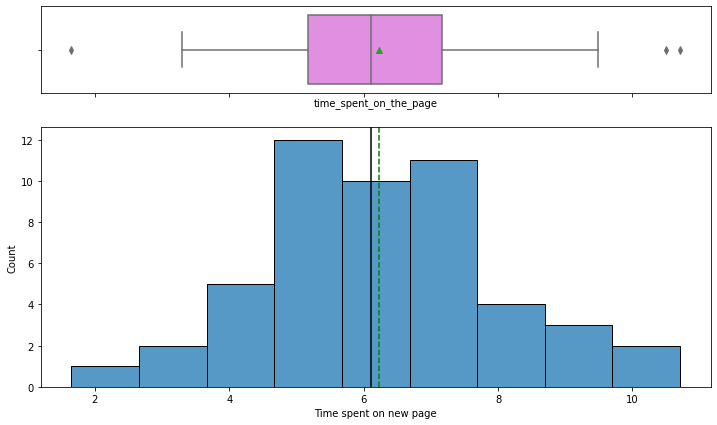

In [21]:
histogram_boxplot(df_new,"time_spent_on_the_page")
plt.xlabel("Time spent on new page");

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

In [2]:
# what percentage of users get converted after visiting the pages
labeled_barplot(data, "converted")

NameError: name 'labeled_barplot' is not defined

#### Observations: 
The bar plot shows that 54% of the users get converted compared to 46% that don't get converted
- But our focus is where the most conversion rates occur, Is it on the new page or old page.
- Lets see that below

### Let us see the percentage of people that got converted on the different landing pages

 1. Old page

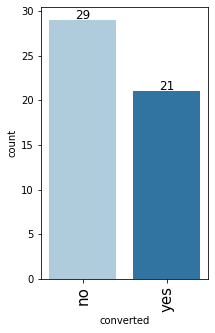

In [24]:
# bar graph to show the percentage of people that visited the old page and got converted
labeled_barplot(df_old, "converted")

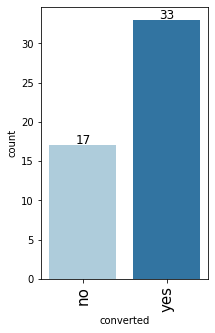

In [25]:
# bar graph to show the percentage of people that visited the new page and got converted
labeled_barplot(df_new, "converted")

#### Observations:
From the analysis above, the users who visited the new landing page got more converted.

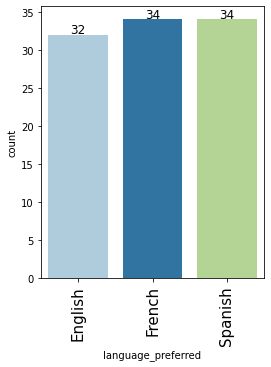

In [26]:
# bar graph to show the percentage of users who preferred the different languages
labeled_barplot(data, "language_preferred")

#### Observations:
- Out of 100 sampled users; 34 prefer Spanish, 34 prefer French and 32 prefer English

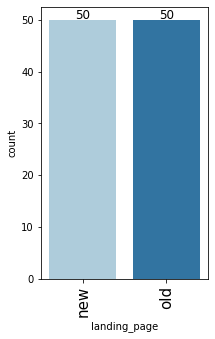

In [27]:
# bar graph to show the percentage of users on the different pages
labeled_barplot(data, "landing_page")

### Observation:
- Like the objective states, 100 users were sampled and divided into two equal groups. The graph above proves this point as 50 users were served the old page and 50 users were served the new page

### Bivariate Analysis

### Landing page vs time pent on the page

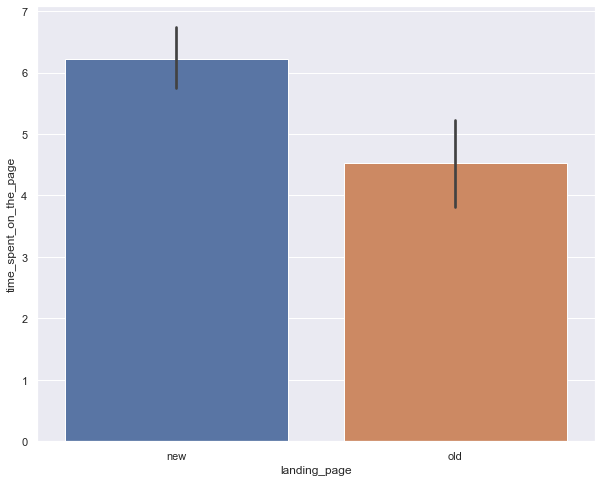

In [28]:
sns.set(rc = {'figure.figsize':(10,8)}) # set size of the seaborn plots
sns.barplot(x="landing_page", y="time_spent_on_the_page", data=data);

### Observation:
- Users tend to spend more time on the new page as compared to the old page

### Converted users vs time spent on the page

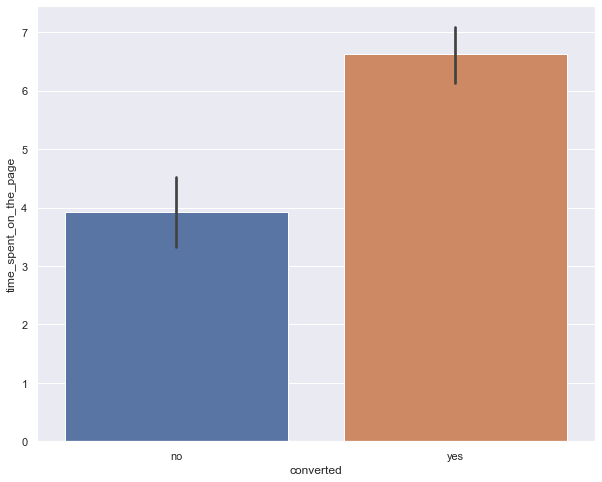

In [29]:
sns.barplot(x="converted", y="time_spent_on_the_page", data=data);

### Observation:
- Users that got converted spent more time on the pages.

### Language preferred vs Converted status

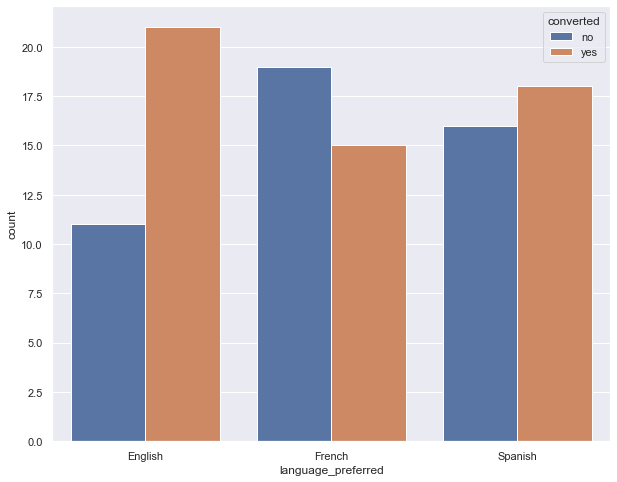

In [30]:
sns.countplot(x="language_preferred", hue="converted", data=data);

### Observation:
- The ratio of users that got converted to that that did not get converted for English users is higher compared to other language users.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

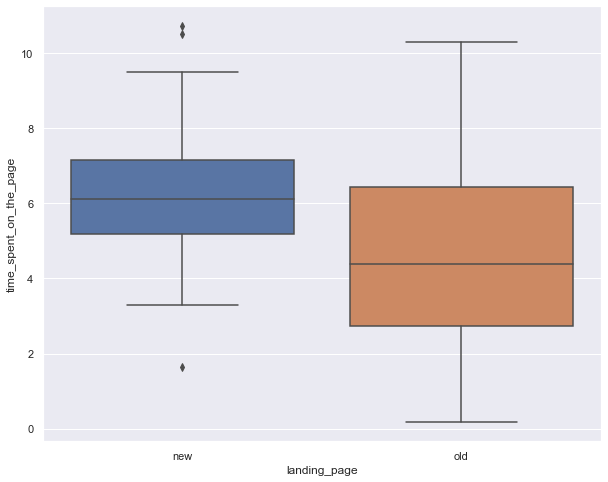

In [31]:
# visual analysis of the time spent on the new and old page
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data);

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be mean time users spend on the existing page and new page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_2>\mu_1$


### Step 2: Select Appropriate test

- one-tailed test
- two population means
- independent populations

NB: This is a T-test for independent populations.

### Step 3: Decide the significance level

- As provided in the problem statement, let us assume the significance level($\alpha$) = 0.05

### Step 4: Collect and prepare data

In [32]:
# Calculating standard deviation for time spend on new page

std_new_page = df_new["time_spent_on_the_page"].std()
print(round(std_new_page, 2))

1.82


In [33]:
# Calculating standard deviation for time spend on old page

std_old_page = df_old["time_spent_on_the_page"].std()
print(round(std_old_page,2))

2.58


#### Observation:
- The standard deviation of the time spent on the new page is different from that of the old page from the sample data.
- Hence the population deviations can not be assumed to be equal.
- This means we areto use the T-test for independent populations for unequal Standard deviations

### Step 5: Calculate the p-value

In [34]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_new['time_spent_on_the_page'], df_old['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ' + str(p_value))

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [35]:
# print the whether p-value is greater or less than alpha
if p_value < 0.05:
    print(" The p-value is less than the level of significance")
else:
    print("The p-value is greater than the level of significance")

 The p-value is less than the level of significance


#### Observation:

The P-value is much less than $\alpha$


### Step 7:  Draw inference

#### Observation:
Since the P-value is much less than the level of Significance, we reject the null hypothesis. Therefore we have enough statistical significance to conclude that users spend more time on the new landing page than the existing page.


## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

###  Perform Visual analysis

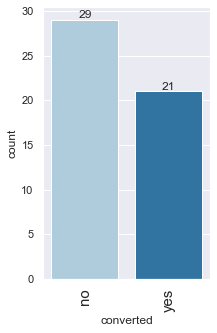

In [36]:
# visual analysis of the proportion of users who visit the old landing page and get converted
labeled_barplot(df_old, "converted")

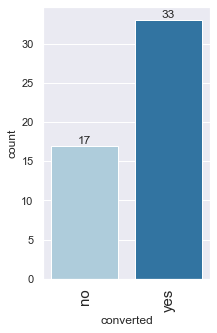

In [37]:
# visual analysis of the proportion of users who visit the new landing page and get converted
labeled_barplot(df_new, "converted")

### Step 1: Define the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users that visit the new page and old page and get converted respectively.

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

- Binomally distributed population
- One-tailed test
- two population proportions
- independent populations

NB: The appropriate test to be used will be the two-proportion Z-test

### Step 3: Decide the significance level

- As provided in the problem statement, let us assume the significance level($\alpha$) = 0.05

### Step 4: Collect and prepare data

In [38]:
# check for total number of users in each group
data["group"].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [39]:
# calculate the number of users that were served the new page and got converted
new_page_converted_users = df_new[df_new["converted"]=="yes"].value_counts()
print(len(new_page_converted_users))

33


In [40]:
# calculate the number of users that were served the old page and got converted
old_page_converted_users = df_old[df_old["converted"]=="yes"].value_counts()
print(len(old_page_converted_users))

21


### Insight:
- Each group of users has 50 people
- 33 users got converted when they visited the new page
- 21 users got converted when they visited  the old page

### Step 5: Calculate the p-value

In [41]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the count of converted users
converted_users = np.array([33, 21])

# set the sample sizes
sampled_users = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_users, sampled_users)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [42]:
# print the whether p-value is greater or less than alpha
if p_value < 0.05:
    print(" The p-value is less than the level of significance")
else:
    print("The p-value is greater than the level of significance")

 The p-value is less than the level of significance


### Step 7:  Draw inference

As the p-value is less than the significance level 0.05, we reject the null hypothesis. Therefore, we have enough statistical significance to conclude that the conversion rate for the new page is greater than the conversion rate for the old page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

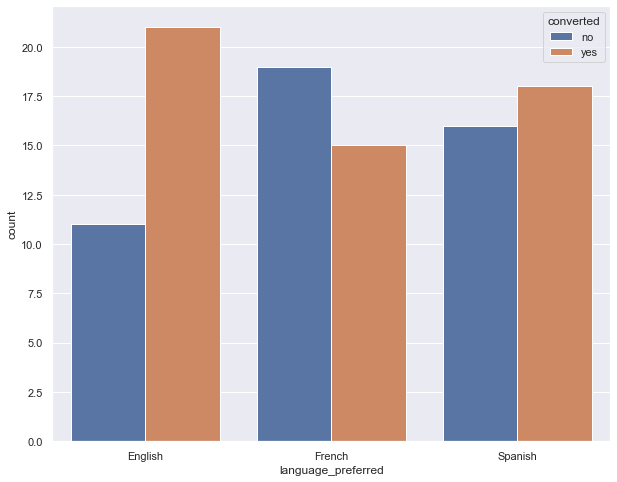

In [43]:
# visual analysis of the coversion count depending on the language Preferences
sns.countplot(x="language_preferred", hue="converted", data=data);

###  Step 1: Define null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language .

against the alternate hypothesis

>$H_a:$ Conversion depends on preferred language.

### Step 2: Select appropriate test

- We are to test for independence
- The variables are categorical
- Number of observations in each category is greater than 5

NB: Therefore, the appropriate test for this problem is **Chi-Square Test for Independence**

### Step 3: Decide the significance level
- As provided in the problem statement, let us assume the significance level($\alpha$) = 0.05

### Step 4: Collect and prepare data

In [44]:
#preparing the contingency table
cont_table= pd.crosstab(data['language_preferred'],data['converted'])
cont_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [45]:
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(cont_table)
print('The p-value is ', p_value)

The p-value is  0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [46]:
# print the whether p-value is greater or less than alpha
if p_value < 0.05:
    print(" The p-value is less than the level of significance")
else:
    print("The p-value is greater than the level of significance")

The p-value is greater than the level of significance


### Step 7:  Draw inference

#### Observation:
As the p-value is much greater than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that conversion depends on preferred language at 5% significance level.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform visual analysis

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


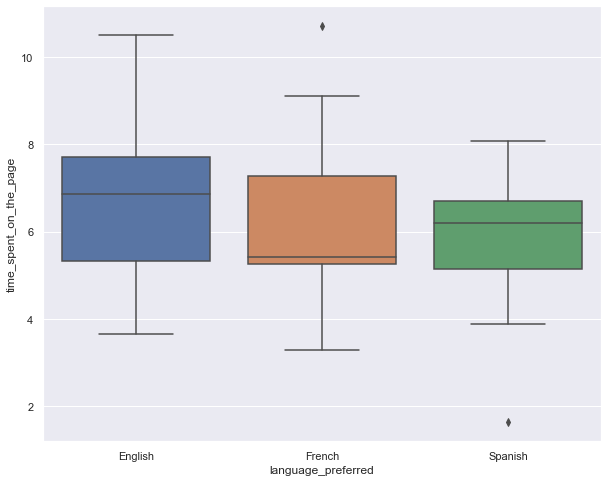

In [47]:
# print the mean of time spent on the new page by the different groups of users with different language preferences
print(df_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

# plot the box plot of the time spent on the new page depending on language preferred
sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df_new);

### Step 1: Define the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page by different language users; English, French, Spanish respectively

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ In at least in one category of language, mean time spent on the new page is different

### Step 2: Decide the significance level
- As provided in the problem statement, let us assume the significance level($\alpha$) = 0.05

### Step 3:  Select the appropriate test

- This problem concerns three population means, therefore we shall use One-way ANOVA test

- NB: Let us go ahead and test if the assumptions are satisfied for this test

### Testing for normality

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [48]:
# Assumption 1: Normality
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the time spent on the new landing page follows the normal distribution.

### Testing for Equality of variances

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

### Prepare the data

In [49]:
# create a dataframe for users on the new page that prefer the English Language
df_new_english = df_new[df_new["language_preferred"]=="English"]
# create a dataframe for users on the new page that prefer the French Language
df_new_french = df_new[df_new["language_preferred"]=="French"]
# create a dataframe for users on the new page that prefer the Spanish Language
df_new_spanish = df_new[df_new["language_preferred"]=="Spanish"]

In [50]:
#Assumption 2: Homogeneity of Variance
from scipy.stats import levene
statistic, p_value = levene( df_new_english['time_spent_on_the_page'], 
                                   df_new_french['time_spent_on_the_page'], 
                                   df_new_spanish['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of equal of variances.

### Observations:
The assumptions for the One-way Anova test are satisfied according to the results of levene and shapiro tests. So we can go ahead with the test

### Step 4:  Calculate the p-value

In [51]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new_english['time_spent_on_the_page'],
                              df_new_french['time_spent_on_the_page'],
                              df_new_spanish['time_spent_on_the_page'])
print('The p_value is ' + str(p_value))

The p_value is 0.43204138694325955


### Step 5: Compare the p-value with $\alpha$

In [52]:
# print the whether p-value is greater or less than alpha
if p_value < 0.05:
    print(" The p_value is less than the level of significance")
else:
    print("The p_value is greater than the level of significance")

The p_value is greater than the level of significance


### Step 6:  Draw inference

As the p-value is much greater than the level of significance, therefore we fail to reject the null hypothesis. We do not have enough statistical significance to conclude that the time spent on the new page is different for atleast one kind of language users at 5% significance level.

## Conclusion and Business Recommendations

- Basing on the analysis above, at 5% significance level, there is enough statistical significance to conclude that the conversion rate for the new page is greater than the conversion rate for the old page. This means that the new feature will be effective as the new page shows more effectiveness in gathering new subscribers.
- Something to also note, is that conversion is independent of the language preferred by the users.
- Also, Users spend more time on the new page but this time is independent of the language preferred by the users.

##### In conclusion therefore, the recommendation i  give E-news Express is to go ahead with the new feature/new landing page designed by the design team as it shows effectiveness in gathering new subscibers.